In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')
    
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [3]:
g = 9.81
l = 0.2
M = 0.5
mu = 1.5e-2
J = 1.0e-2

P = ct.tf([0, 1], [J, mu, M*g*l])

ref = 30

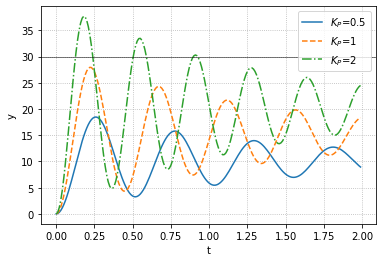

In [5]:
# P control
kp = (0.5, 1, 2)
LS = linestyle_generator()
fig, ax = plt.subplots()
for i in range(len(kp)):
    K = ct.tf([0, kp[i]], [0, 1])
    Gyr = ct.feedback(P*K, 1)
    t, y = ct.step_response(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$K_P$='+str(kp[i])}
    ax.plot(t, y*ref, **pltargs)
ax.axhline(ref, color="k", linewidth=0.5)
plot_set(ax, 't', 'y', 'best')

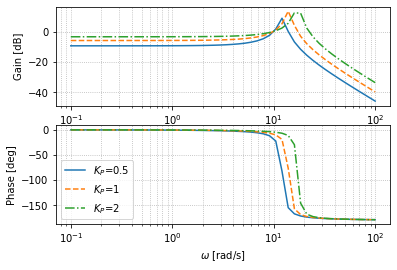

In [9]:
# P control
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)

for i in range(len(kp)):
    K = ct.tf([0, kp[i]], [0, 1])
    Gyr = ct.feedback(P*K, 1)
    gain, phase, w = ct.bode_plot(Gyr, np.logspace(-1, 2), Plot=False)
    pltargs = {'ls': next(LS), 'label': '$K_P$='+str(kp[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
bodeplot_set(ax, 'lower left')

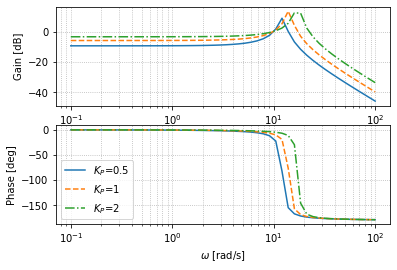

In [10]:
LS = linestyle_generator()
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for g in kp:
    K = ct.tf([0, g], [0, 1])
    Gyr = ct.feedback(P*K, 1)
    gain, phase, w = ct.bode_plot(Gyr, np.logspace(-1, 2), Plot=False)
    pltargs = {'ls': next(LS), 'label': '$K_P$='+str(g)}
    ax1.semilogx(w, 20*np.log10(gain), **pltargs)
    ax2.semilogx(w, phase*180/np.pi, **pltargs)
bodeplot_set((ax1, ax2), 'lower left')

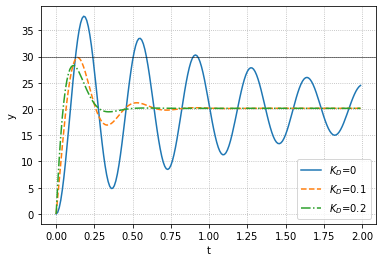

In [11]:
# PD control
kp = 2
kd = (0, 0.1, 0.2)

LS = linestyle_generator()
fig, ax = plt.subplots()
for i in range(len(kd)):
    K = ct.tf([kd[i], kp], [0, 1])
    Gyr = ct.feedback(P*K, 1)
    t, y = ct.step_response(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$K_D$='+str(kd[i])}
    ax.plot(t, y*ref, **pltargs)
ax.axhline(ref, color="k", linewidth=0.5)
plot_set(ax, 't', 'y', 'best')

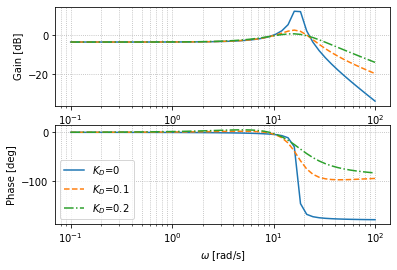

In [13]:
# PD control
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)
for i in range(len(kd)):
    K = ct.tf([kd[i], kp], [0, 1])
    Gyr = ct.feedback(P*K, 1)
    gain, phase, w = ct.bode_plot(Gyr, np.logspace(-1, 2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': '$K_D$='+str(kd[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
bodeplot_set(ax, 'lower left')

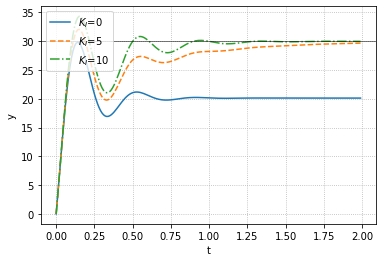

In [14]:
# PID control
kp = 2
kd = 0.1
ki = (0, 5, 10)

LS = linestyle_generator()
fig, ax = plt.subplots()
for i in range(len(ki)):
    K = ct.tf([kd, kp, ki[i]], [1, 0])
    Gyr = ct.feedback(P*K, 1)
    t, y = ct.step_response(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label':'$K_I$='+str(ki[i])}
    ax.plot(t, y*ref, **pltargs)
ax.axhline(ref, color="k", linewidth=0.5)
plot_set(ax, 't', 'y', 'upper left')

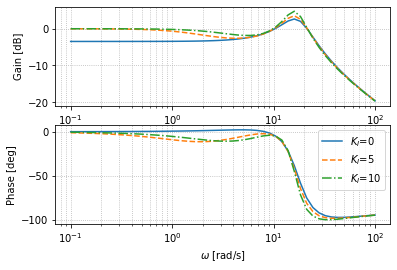

In [16]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)
for i in range(len(ki)):
    K = ct.tf([kd, kp, ki[i]], [1, 0])
    Gyr = ct.feedback(P*K, 1)
    gain, phase, w = ct.bode_plot(Gyr, np.logspace(-1, 2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': '$K_I$='+str(ki[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
bodeplot_set(ax, 'best')